In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib as mp

%matplotlib inline
import matplotlib.pyplot as plt

train = pd.read_csv('../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [2]:
train.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [3]:
train.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [4]:
#Transformamos las fechas
train['fecha'] = pd.to_datetime(train['fecha'])

In [5]:
train.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

In [6]:
train = train.loc[(~train['fecha'].isnull())]

In [7]:
train.loc[~(train['fecha'].isnull())].count()

id                            240000
titulo                        234613
descripcion                   238381
tipodepropiedad               239954
direccion                     186928
ciudad                        239628
provincia                     239845
antiguedad                    196445
habitaciones                  217529
garages                       202235
banos                         213779
metroscubiertos               222600
metrostotales                 188533
idzona                        211379
lat                           116512
lng                           116512
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64

In [8]:
train[train['titulo'].isna()].count()

id                            5387
titulo                           0
descripcion                   5100
tipodepropiedad               5387
direccion                     4473
ciudad                        5382
provincia                     5387
antiguedad                    4678
habitaciones                  5011
garages                       4662
banos                         4889
metroscubiertos               4948
metrostotales                 3768
idzona                        3931
lat                           1083
lng                           1083
fecha                         5387
gimnasio                      5387
usosmultiples                 5387
piscina                       5387
escuelascercanas              5387
centroscomercialescercanos    5387
precio                        5387
dtype: int64

## ¿Cual es el periodo cubierto por las fechas?

In [9]:
print("Fecha Min.: ", train['fecha'].min())
print("Fecha Max.: ", train['fecha'].max())

Fecha Min.:  2012-01-01 00:00:00
Fecha Max.:  2016-12-31 00:00:00


## ¿Cómo se distribuyen las publicaciones de propiedades por año?

Text(0, 0.5, 'cantidad')

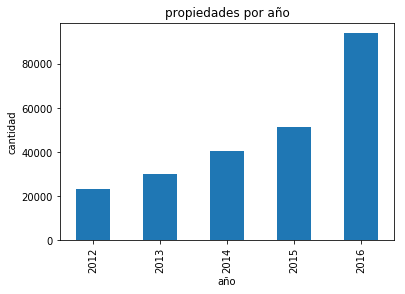

In [10]:
prop_total = train
ax = prop_total['fecha'].dt.year.value_counts().sort_index().plot.bar(title="propiedades por año")
ax.set_xlabel('año')
ax.set_ylabel('cantidad')

In [11]:
# Diferenciamos mes y año
prop = train
prop['year'] = train['fecha'].dt.year
prop['month'] = prop['fecha'].dt.month

In [12]:
prop_2012 = train[train['fecha'].dt.year == 2012]
prop_2013 = train[train['fecha'].dt.year == 2013]
prop_2014 = train[train['fecha'].dt.year == 2014]
prop_2015 = train[train['fecha'].dt.year == 2015]
prop_2016 = train[train['fecha'].dt.year == 2016]

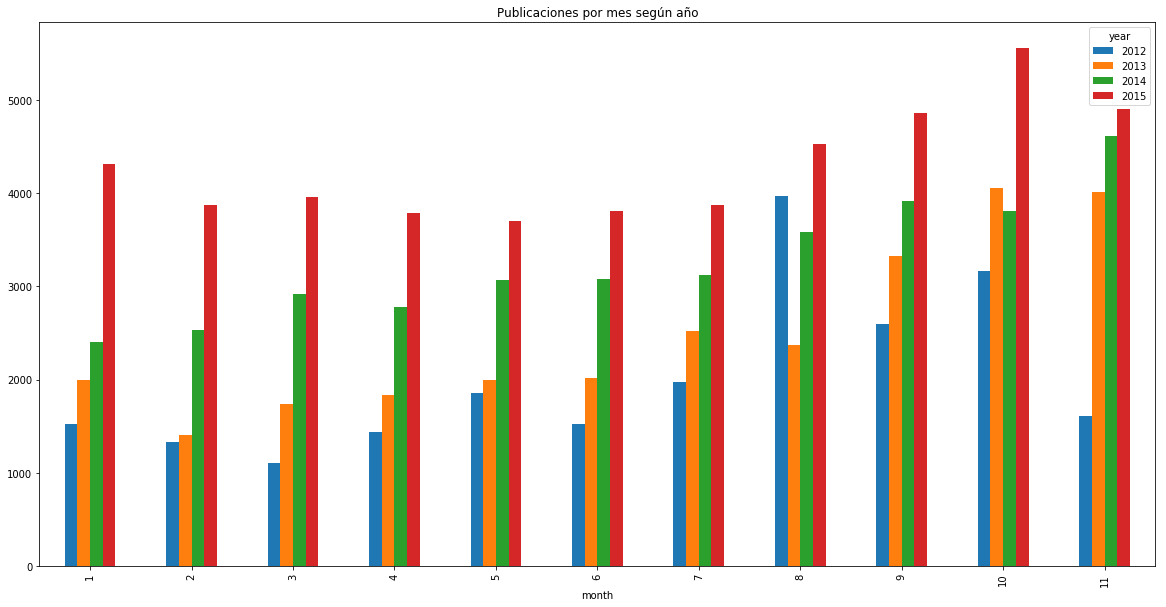

In [13]:
# Removemos las publicaciones de diciembre por tenes en el último a año un valor muy elevado
prop2 = prop[(prop['year'] != 2016) & (prop['month'] != 12)]
prop2.groupby(by=['year','month']).count()['id'].unstack().transpose()\
.plot.bar(figsize=(20,10),title="Publicaciones por mes según año")

## ¿Cualés son los diferentes tipos de propiedad y cómo se distribuyen sobre el total?

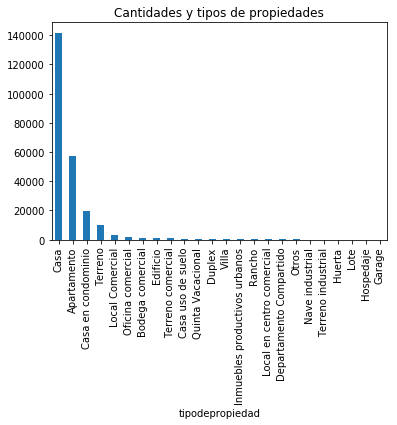

In [14]:
prop.groupby('tipodepropiedad').count()\
['id'].sort_values(ascending=False).plot.bar(title="Cantidades y tipos de propiedades")

## ¿Qué relación existe entre el precio, los metros cuadrados y la cantidad de habitaciones de los departamentos?

In [15]:
# Seteamos el precio en dolares
cotizacion_hoy = 19.54
prop['precio_USD'] = prop['precio'] / cotizacion_hoy

print(prop['precio_USD'].head(2))
print(prop['precio'].head(2))

prop['precioXmt'] = prop['precio_USD']/prop['metrostotales']

0    116325.486182
1    184237.461617
Name: precio_USD, dtype: float64
0    2273000.0
1    3600000.0
Name: precio, dtype: float64


In [17]:
deptos = prop[prop['tipodepropiedad'] == 'Apartamento']
deptos[['antiguedad','precioXmt','metrostotales','precio_USD','habitaciones']].describe()
# Vemos que el 75% de los departamentos tiene hasta 3 habitaciones

,antiguedad,precioXmt,metrostotales,precio_USD,habitaciones
count,48290.000000,29348.000000,29348.000000,57341.000000,56347.000000
mean,8.362021,1163.480702,117.907762,141441.589675,2.386533
std,9.524304,746.745995,67.700617,119896.352649,0.630951
min,0.000000,44.779939,15.000000,15864.892528,1.000000
25%,1.000000,660.493296,70.000000,53735.926305,2.000000
50%,5.000000,1038.208315,97.000000,101807.983623,2.000000
75%,10.000000,1516.357709,145.000000,190973.643808,3.000000
max,80.000000,37529.853292,438.000000,640736.949846,10.000000


In [18]:
(prop.groupby('habitaciones').count()['id'])/prop['habitaciones'].count()*100

habitaciones
1.0      2.330264
2.0     26.574847
3.0     56.032529
4.0     11.523981
5.0      2.112822
6.0      0.767254
7.0      0.247783
8.0      0.182964
9.0      0.082288
10.0     0.145268
Name: id, dtype: float64

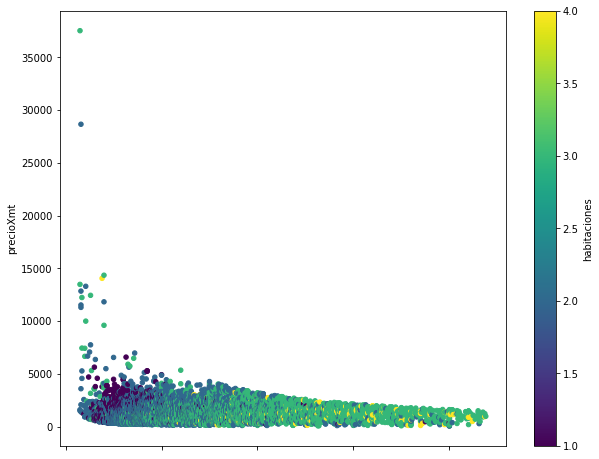

In [19]:
r = deptos[['precioXmt','metrostotales','habitaciones']]
# Sacamos los NaN
r = r[~r['metrostotales'].isna()]
# Sacamos los que tienen menos de 5 habitaciones, ya que son casos aislados
r = r[r['habitaciones'] < 5]
r = r.sort_values(by=['metrostotales'],ascending=True)
r.plot.scatter(x='metrostotales',y='precioXmt',c='habitaciones',colormap='viridis',figsize=(10,8))

## ¿Cómo se distribuyen las publicaciones de deptos según los metros totales?

In [20]:
# Vamos a estudiar los departamentos
deptos = prop[prop['tipodepropiedad'] == 'Apartamento']
deptos['precioXmt'] = deptos['precio_USD'] / deptos['metrostotales']

/home/lucas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


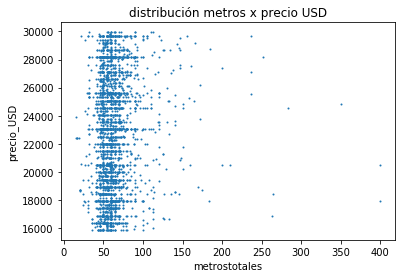

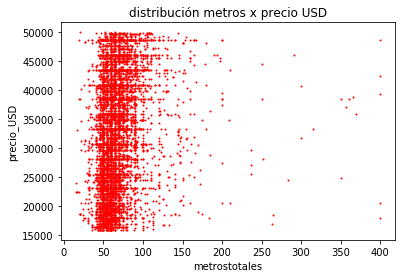

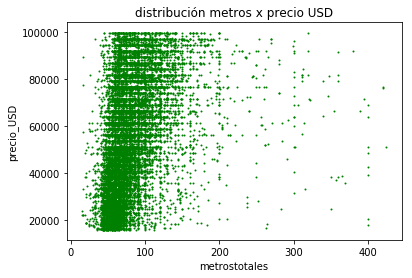

In [21]:
r = deptos[['precioXmt','metrostotales','precio_USD']]
limite1 = 30000
limite2 = 50000
limite3 = 100000
#Saco los NaN
r = r[~r['metrostotales'].isna()]
r2 = r[r['precio_USD'] < limite1]
r2.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=1,title='distribución metros x precio USD')

r3 = r[r['precio_USD'] < limite2]
r3.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=1,c='red',title='distribución metros x precio USD')

r4 = r[r['precio_USD'] < limite3]
r4.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=1,c='green',title='distribución metros x precio USD')

## ¿Qué relación existe entre el precio y la cantidad de metros cuadrados de la propiedad?

In [23]:
prop.head(1).transpose()

,0
id,254099
titulo,depto. tipo a-402
descripcion,"depto. interior de 80.15m2, consta de sala com..."
tipodepropiedad,Apartamento
direccion,Avenida Division del Norte 2005
ciudad,Benito Juárez
provincia,Distrito Federal
antiguedad,NaN
habitaciones,2
garages,1


In [36]:
prop_sorted = prop[['precio_USD','metrostotales']].sort_values(by='metrostotales',ascending=True)

<Figure size 800x800 with 0 Axes>

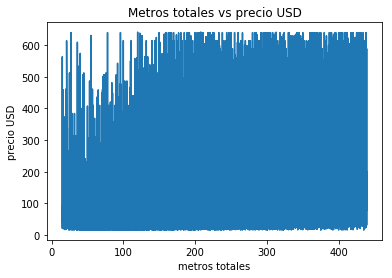

<Figure size 800x800 with 0 Axes>

In [73]:
p = prop_sorted['metrostotales']
# En miles de dólares
m = (prop_sorted['precio_USD'] / 1000)
plt.plot(p,m)
plt.xlabel('metros totales')
plt.ylabel('precio USD')
plt.title('Metros totales vs precio USD')
plt.figure(num=None,figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
#.set_size_inches(18.5, 10.5, forward=True)
#plt.show()
#fig.set_size_inches(18.5, 10.5)

## ¿Cuál es el precio promedio por ciudad?

In [76]:
prop.head(2).transpose()

,0,1
id,254099,53461
titulo,depto. tipo a-402,condominio horizontal en venta
descripcion,"depto. interior de 80.15m2, consta de sala com...","<p>entre sonora y guerrero, atr&aacute;s del h..."
tipodepropiedad,Apartamento,Casa en condominio
direccion,Avenida Division del Norte 2005,AV. MEXICO
ciudad,Benito Juárez,La Magdalena Contreras
provincia,Distrito Federal,Distrito Federal
antiguedad,NaN,10
habitaciones,2,3
garages,1,2


In [88]:
prop[['ciudad','precio_USD']].describe()#groupby(['precio_USD']).mean()

,precio_USD
count,240000.000000
mean,129520.897948
std,110161.299776
min,15864.892528
25%,48760.107472
50%,94677.584442
75%,173490.276356
max,640992.835210


In [167]:
prop_mean_year_city_g = prop.groupby(['year','ciudad']).mean()['precio_USD']

In [168]:
prop_mean_year_city=prop_mean_year_city_g.reset_index().rename(columns={"precio_USD": "precio_USD_prom"})


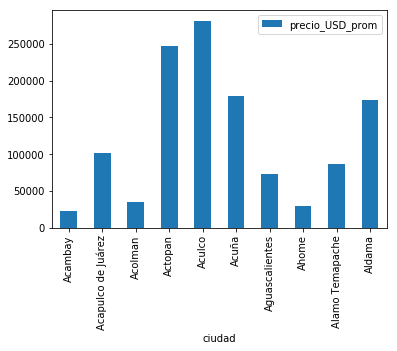

In [187]:
ax = prop_mean_year_city[prop_mean_year_city['year']==2012][['ciudad','precio_USD_prom']].head(10).plot.bar(x='ciudad',y='precio_USD_prom')

In [202]:
precio_mean_2012 = prop_mean_year_city[prop_mean_year_city['year']==2012].sort_values(by='ciudad')[['ciudad','precio_USD_prom']]
precio_mean_2013 = prop_mean_year_city[prop_mean_year_city['year']==2013].sort_values(by='ciudad')[['ciudad','precio_USD_prom']]
precio_mean_2014 = prop_mean_year_city[prop_mean_year_city['year']==2014].sort_values(by='ciudad')[['ciudad','precio_USD_prom']]
precio_mean_2015 = prop_mean_year_city[prop_mean_year_city['year']==2015].sort_values(by='ciudad')[['ciudad','precio_USD_prom']]
precio_mean_2016 = prop_mean_year_city[prop_mean_year_city['year']==2016].sort_values(by='ciudad')[['ciudad','precio_USD_prom']]

In [203]:
precio_mean_2013.head()

,ciudad,precio_USD_prom
454,Abalá,16120.777892
455,Abasolo,435005.117707
456,Abejones,127942.681679
457,Acajete,110030.706244
458,Acambay,60986.011600


In [204]:
df = pd.DataFrame()
df[['ciudad','p_m_2012']] = precio_mean_2012[['ciudad','precio_USD_prom']]

In [206]:
df.head()

,ciudad,p_m_2012
0,Acambay,23029.682702
1,Acapulco de Juárez,102178.872596
2,Acolman,35630.209095
3,Actopan,247238.996929
4,Aculco,281473.899693


In [213]:
#df = df.set_index('ciudad').join(precio_mean_2013.set_index('ciudad'))#.rename(columns={"precio_USD_prom":"p_m_2013"})
df = df.join(precio_mean_2014.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2014"})
df = df.join(precio_mean_2015.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2015"})
df = df.join(precio_mean_2016.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2016"})
df

,p_m_2012,p_m_2013,p_m_2014,p_m_2014,p_m_2015,p_m_2016
ciudad,,,,,,
Acambay,23029.682702,60986.011600,NaN,NaN,NaN,255885.363357
Acapulco de Juárez,102178.872596,109148.216173,127805.487626,127805.487626,129692.349841,158517.833854
Acolman,35630.209095,35354.827704,45547.594678,45547.594678,52932.766121,53621.395546
Actopan,247238.996929,20982.599795,71647.901740,71647.901740,101586.489253,99692.937564
Aculco,281473.899693,28147.389969,94933.469806,94933.469806,NaN,110030.706244
Acuña,179119.754350,255885.363357,28659.160696,28659.160696,NaN,43500.511771
Aguascalientes,73056.819673,73306.322880,69975.628301,69975.628301,78763.613331,91160.599773
Ahome,30066.530194,83334.442170,53931.389346,53931.389346,58195.963408,64412.020926
Alamo Temapache,87001.023541,NaN,NaN,NaN,NaN,24426.612078


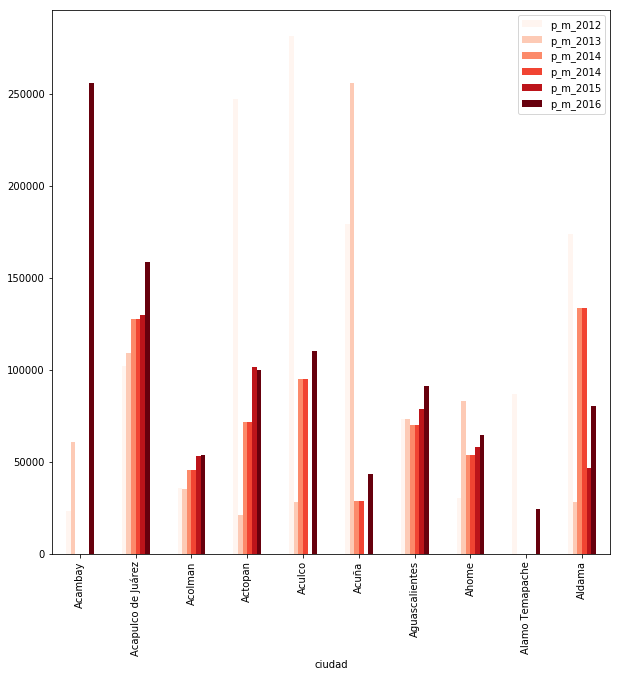

In [256]:
import matplotlib as mpl
#cmap = mpl.cm.cool
plot = df.head(10).plot.bar(figsize=(10,10),cmap='Reds')#'viridis',RdPu